---

In [194]:
import os
import glob
import pandas as pd
# 건선_스킨케어 디렉토리의 모든 CSV 파일 경로
csv_directory = '/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/피부 질환 화장품 데이터/크림'
csv_files = glob.glob(os.path.join(csv_directory, '*.csv'))
print(f"총 {len(csv_files)}개의 CSV 파일을 찾았습니다.")

총 13개의 CSV 파일을 찾았습니다.


#### 제목 넣기

In [195]:
# 각 CSV 파일에 product_name 열 추가 (중복 방지)
for file_path in csv_files:
    product_name = os.path.basename(file_path).replace('.csv', '')
    df_temp = pd.read_csv(file_path)
    
    # 이미 product_name 열이 있으면 값을 갱신, 없으면 추가
    if 'product_name' in df_temp.columns:
        df_temp['product_name'] = product_name
    else:
        df_temp.insert(0, 'product_name', product_name)
    
    df_temp.to_csv(file_path, index=False)
    print(f"처리 완료: {product_name}")

print("모든 파일에 product_name 열이 정상적으로 추가(또는 갱신)되었습니다.")

처리 완료: 닥터지 더모이스처 배리어D 인텐스 크림
처리 완료: 유세린 아쿠아포린 액티브 리치크림
처리 완료: 아누아 어성초 센텔라 레드 스팟 크림
처리 완료: 에스네이처 아쿠아 오아시스 수분 젤크림
처리 완료: 바이오더마 시카비오 크림
처리 완료: 피부미 센텔루션 시카 크림
처리 완료: 라로슈포제 시카플라스트 밤B5
처리 완료: 후시다인 후시드 크림
처리 완료: 닥터멜락신 아쿠아 이온 플라즈마 수분 크림
처리 완료: 닥터지 레드 블레미쉬 클리어 모이스처 크림
처리 완료: 닥터디퍼런트 시카 메탈 크림
처리 완료: 닥터지 블랙 스네일 크림
처리 완료: 에스트라 아토베리어 365크림
모든 파일에 product_name 열이 정상적으로 추가(또는 갱신)되었습니다.


---

In [196]:
from locale import D_FMT
import os
import glob
import pandas as pd
# 모든 파일을 읽어서 하나의 데이터프레임으로 합치기
df_list = []
for file_path in csv_files:
    df_temp = pd.read_csv(file_path)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

# 원하는 열만 남기고 나머지는 삭제
columns_to_keep = ['product_name', 'id', 'tag', 'tag 2', 'tag 3', 'tag 4', 'point_flag','point', 'date', 'txt_inner']
df = df[columns_to_keep]

In [197]:
df.head()

,product_name,id,tag,tag 2,tag 3,tag 4,point_flag,point,date,txt_inner
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,한달이상사용,5점만점에 5점,2025.07.24,🔸닥터지 더모이스처 배리어D 인텐스크림 : 제가 이 제품을 사용하고 이렇게 오랜기간...
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,NaN,5점만점에 5점,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다!! 화장 잘 뜨고 각질 많이 일어...
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,NaN,NaN,NaN,NaN,한달이상사용,5점만점에 5점,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,NaN,5점만점에 5점,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,NaN,5점만점에 4점,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요. 그래서 저는 아토피 올라오는...


In [198]:
## 5점 만점에 5점 -> 5로 변경
df['point'] = df['point'].str.extract(r'(\d+)점$')[0]

In [199]:

# 컬럼명  변경 코드
df = df.rename(columns={
    'id': 'reviewer_id',
    'tag': 'skin_type',
    'tag 2': 'skin_tone',
    'tag 3': 'skin_concern_1',
    'tag 4': 'skin_concern_2',
    'point_flag': 'usage_period_flag',
    'more_msg': 'review_note',
    'point': 'rating',
    'date': 'review_date',
    'txt_inner': 'review',
})

df.head()

,product_name,reviewer_id,skin_type,skin_tone,skin_concern_1,skin_concern_2,usage_period_flag,rating,review_date,review
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,한달이상사용,5,2025.07.24,🔸닥터지 더모이스처 배리어D 인텐스크림 : 제가 이 제품을 사용하고 이렇게 오랜기간...
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,NaN,5,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다!! 화장 잘 뜨고 각질 많이 일어...
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,NaN,NaN,NaN,NaN,한달이상사용,5,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,NaN,5,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,NaN,4,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요. 그래서 저는 아토피 올라오는...


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_name       1108 non-null   object
 1   reviewer_id        1108 non-null   object
 2   skin_type          498 non-null    object
 3   skin_tone          490 non-null    object
 4   skin_concern_1     478 non-null    object
 5   skin_concern_2     387 non-null    object
 6   usage_period_flag  420 non-null    object
 7   rating             1108 non-null   object
 8   review_date        1108 non-null   object
 9   review             1108 non-null   object
dtypes: object(10)
memory usage: 86.7+ KB


---

### 데이터 Cleaning

In [201]:
df=df.drop_duplicates(['review'])
df=df.reset_index(drop=True)

In [202]:
# # summary_1	summary_2	summary_3	review 합치기
# df['review'] = df[['summary_1', 'summary_2', 'summary_3', 'review']].apply(lambda x: ' '.join([str(t) for t in x if pd.notnull(t)]), axis=1)

In [203]:
# 삭제할 컬럼 리스트  'summary_1', 'summary_2', 'summary_3',
cols_to_drop = ['usage_period_flag']

# 컬럼 삭제
df = df.drop(cols_to_drop, axis=1)

In [204]:
import re

# review NaN인 행 제거
df = df.dropna(subset=['review'])

# 한글만 추출하는 함수
def extract_word(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
    result = hangul.sub(' ', text)
    return result

# 한글만 남기고 review 컬럼에 적용
df['review'] = df['review'].apply(extract_word)

# 공백을 모두 제거한 토큰 컬럼 생성
df['tokens'] = df['review'].str.replace(' ', '', regex=False)

# tokens가 빈 문자열인 행 제거
df = df[df['tokens'].str.len() > 0].reset_index(drop=True)

df.head()

,product_name,reviewer_id,skin_type,skin_tone,skin_concern_1,skin_concern_2,rating,review_date,review,tokens
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,5,2025.07.24,닥터지 더모이스처 배리어 인텐스크림 제가 이 제품을 사용하고 이렇게 오랜기간...,닥터지더모이스처배리어인텐스크림제가이제품을사용하고이렇게오랜기간사용하게될줄은몰랐는데년반...
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,5,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다 화장 잘 뜨고 각질 많이 일어나...,악건성인데화장하기전에무조건바르는크림입니다화장잘뜨고각질많이일어나시는건성분들은진짜정말정...
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,NaN,NaN,NaN,NaN,5,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...,현직메컵아티스트입니다이거안맞는분한번도못봤어용기초할때선크림직전에발라주고흡수시켜주고선크...
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,5,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요,보습필요할때사용하고있어요가볍게바르기좋고보습을필요로할때는듬뿍발라주고있어요
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,4,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요 그래서 저는 아토피 올라오는...,다른크림들과비교해서확실히가려움에효과가있어요그래서저는아토피올라오는부분에발라주는데세라마...


In [205]:
## nan -> None
df['skin_type'] = df['skin_type'].fillna('None')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_name    1094 non-null   object
 1   reviewer_id     1094 non-null   object
 2   skin_type       1094 non-null   object
 3   skin_tone       480 non-null    object
 4   skin_concern_1  470 non-null    object
 5   skin_concern_2  380 non-null    object
 6   rating          1094 non-null   object
 7   review_date     1094 non-null   object
 8   review          1094 non-null   object
 9   tokens          1094 non-null   object
dtypes: object(10)
memory usage: 85.6+ KB


In [207]:
df['skin_type'].value_counts()

skin_type
None    606
복합성     191
건성      131
민감성      68
지성       48
트러블성     29
약건성      13
중성        7
여름쿨톤      1
Name: count, dtype: int64

---

---

## Token 분리

In [208]:
# pip install konlpy

In [209]:
from konlpy.tag import Komoran

komoran = Komoran(userdic='/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/user_dict.txt')

In [210]:
komoran.pos('지성 복합성 건성 민감성 악건성 트러블성')

[('지성', 'NNG'),
 ('복합성', 'NNG'),
 ('건성', 'NNG'),
 ('민감성', 'NNG'),
 ('악건성', 'NNG'),
 ('트러블성', 'NNG')]

In [211]:
df['tokens'] = df['review'].apply(lambda x: komoran.pos(x))

In [212]:
# df.to_csv('token_review.csv', index=False)

In [213]:
df['tokens'][0]

[('닥터', 'NNP'),
 ('지', 'NNB'),
 ('더', 'MAG'),
 ('모', 'MM'),
 ('이스', 'NNP'),
 ('처', 'NNG'),
 ('배', 'NNG'),
 ('리어', 'NNP'),
 ('인', 'NNG'),
 ('텐', 'NNG'),
 ('스크림', 'NNP'),
 ('제가', 'NNP'),
 ('이', 'MM'),
 ('제품', 'NNG'),
 ('을', 'JKO'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('이렇', 'VA'),
 ('게', 'EC'),
 ('오랜', 'MM'),
 ('기간', 'NNP'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('게', 'EC'),
 ('되', 'VV'),
 ('ㄹ', 'ETM'),
 ('줄', 'NNB'),
 ('은', 'JX'),
 ('모르', 'VV'),
 ('았', 'EP'),
 ('는데', 'EC'),
 ('년', 'NNB'),
 ('반', 'NNP'),
 ('동안', 'NNG'),
 ('이', 'MM'),
 ('제품', 'NNG'),
 ('을', 'JKO'),
 ('꾸준히', 'MAG'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('있', 'VV'),
 ('어요', 'EC'),
 ('밤', 'NNG'),
 ('기초', 'NNG'),
 ('마무리', 'NNG'),
 ('단계', 'NNG'),
 ('로', 'JKB'),
 ('수분크림', 'NNG'),
 ('용', 'XSN'),
 ('으로', 'JKB'),
 ('사용', 'NNG'),
 ('중', 'NNB'),
 ('이', 'VCP'),
 ('ㄴ데', 'EC'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('ㄹ', 'ETM'),
 ('때', 'NNG'),
 ('는', 'JX'),
 ('잘', 'MAG'),
 ('모르', 'VV'),
 ('겠', 'EP'),
 ('다', 'EC'),
 ('싶', 'VX'),


In [214]:
df.head()

,product_name,reviewer_id,skin_type,skin_tone,skin_concern_1,skin_concern_2,rating,review_date,review,tokens
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,5,2025.07.24,닥터지 더모이스처 배리어 인텐스크림 제가 이 제품을 사용하고 이렇게 오랜기간...,"[(닥터, NNP), (지, NNB), (더, MAG), (모, MM), (이스, ..."
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,5,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다 화장 잘 뜨고 각질 많이 일어나...,"[(악건성, NNG), (이, VCP), (ㄴ데, EC), (화장, NNG), (하..."
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,None,NaN,NaN,NaN,5,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...,"[(현직, NNG), (메, NNG), (컵, NNG), (아티스트, NNP), (..."
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,5,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요,"[(보습, NNG), (필요, NNG), (하, XSV), (ㄹ, ETM), (때,..."
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,4,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요 그래서 저는 아토피 올라오는...,"[(다른, MM), (크림, NNG), (들, XSN), (과, JC), (비교, ..."


---

## KSS문장 분리

In [215]:
# from konlpy.tag import Kkma

In [216]:
# kkma=Kkma()
# text = '안녕하세요. 오늘은 날씨가 좋네요.'
# sentences = kkma.sentences(text)
# print(sentences)

---

In [217]:
df['skin_type'].value_counts()

skin_type
None    606
복합성     191
건성      131
민감성      68
지성       48
트러블성     29
약건성      13
중성        7
여름쿨톤      1
Name: count, dtype: int64

## NoneType 분류

'제가' + (건성/지성/복합성/민감성/수부지) + 긍정지정사

In [218]:
# def case1_b(tokens):
#     for j in range(len(tokens)-2):
#         if tokens[j][0] =='제가' and tokens[j+1][0]=='건성' and tokens[j+2][1] == 'VCP':
#             return '건성'
#         elif tokens[j][0] =='제가' and tokens[j+1][0]=='지성' and tokens[j+2][1] == 'VCP':
#             return '지성'
#         elif tokens[j][0] =='제가' and tokens[j+1][0]=='복합성' and tokens[j+2][1] == 'VCP':
#             return '복합성'
#         elif tokens[j][0] =='제가' and tokens[j+1][0]=='수부지' and tokens[j+2][1] == 'VCP':
#             return '수부지'
#         elif tokens[j][0] =='제가' and tokens[j+1][0]=='민감성' and tokens[j+2][1] == 'VCP':
#             return '민감성'

#     return 'None'

In [219]:
   
# def case2_a(review):
#     for i in range(len(review)):
#         if i<len(review)-8:
#             ## 저 의,는 피부타입,피부 복합성
#             if review[i][0]=='저' and (review[i+1][0]=="의" or review[i+1][0] =='는') and (review[i+2][0] == '피부타입' or review[i+2][0] == '피부') and (review[i+3][1] == 'JX' or review[i+3][1] == 'JKS')and review[i+4][0] == '복합성' and ((review[i+5][1] == 'JKB' or review[i+5][1] == 'VCP') or (review[i+5][1] == 'NNG' and (review[i+6][1]=='JKB' or review[i+6][1]=='VCP'))):
#                 type_skin = "복합성"
#                 return type_skin
#             ## 저 의,는 피부타입,피부 지성
#             elif review[i][0]=='저' and (review[i+1][0]=="의" or review[i+1][0] =='는') and (review[i+2][0] == '피부타입' or review[i+2][0] == '피부') and (review[i+3][1] == 'JX' or review[i+3][1] == 'JKS')and review[i+4][0] == '지성' and ((review[i+5][1] == 'JKB' or review[i+5][1] == 'VCP') or (review[i+5][1] == 'NNG' and (review[i+6][1]=='JKB' or review[i+6][1]=='VCP'))):
#                 type_skin = "지성"
#                 return type_skin
#             ## 저 의,는 피부타입,피부 건성
#             elif review[i][0]=='저' and (review[i+1][0]=="의" or review[i+1][0] =='는') and (review[i+2][0] == '피부타입' or review[i+2][0] == '피부') and (review[i+3][1] == 'JX' or review[i+3][1] == 'JKS')and review[i+4][0] == '건성' and ((review[i+5][1] == 'JKB' or review[i+5][1] == 'VCP') or (review[i+5][1] == 'NNG' and (review[i+6][1]=='JKB' or review[i+6][1]=='VCP'))):
#                 type_skin = "건성"
#                 return type_skin
#             ## 저 의,는 피부타입,피부 수부지
#             elif review[i][0]=='저' and (review[i+1][0]=="의" or review[i+1][0] =='는') and (review[i+2][0] == '피부타입' or review[i+2][0] == '피부') and (review[i+3][1] == 'JX' or review[i+3][1] == 'JKS')and review[i+4][0] == '수부지' and ((review[i+5][1] == 'JKB' or review[i+5][1] == 'VCP') or (review[i+5][1] == 'NNG' and (review[i+6][1]=='JKB' or review[i+6][1]=='VCP'))):
#                 type_skin = "지성"
#                 return type_skin
#             ## 저 피부타입,피부 민감성
#             elif review[i][0]=='저' and (review[i+1][0]=="피부타입" or review[i+1][0] =='피부') and (review[i+2][1] == 'JX' or review[i+2][1] == 'JKS')and review[i+3][0] == '민감성' and ((review[i+4][1] == 'JKB' or review[i+4][1] == 'VCP') or (review[i+4][1] == 'NNG' and (review[i+5][1]=='JKB' or review[i+5][1]=='VCP'))):
#                 type_skin = "민감성"

#                 return type_skin                
#             ## 제 피부타입,피부 복합성
#             elif review[i][0]=='제' and (review[i+1][0]=="피부타입" or review[i+1][0] =='피부') and (review[i+2][1] == 'JX' or review[i+2][1] == 'JKS') and review[i+3][0] == '복합성' and ((review[i+4][1] == 'JKB' or review[i+4][1] == 'VCP') or (review[i+4][1] == 'NNG' and (review[i+5][1]=='JKB' or review[i+5][1]=='VCP'))):
#                 type_skin = "복합성"
#                 return type_skin
#             ## 제 피부타입,피부 건성
#             elif review[i][0]=='제' and (review[i+1][0]=="피부타입" or review[i+1][0] =='피부') and (review[i+2][1] == 'JX' or review[i+2][1] == 'JKS')and review[i+3][0] == '건성' and ((review[i+4][1] == 'JKB' or review[i+4][1] == 'VCP') or (review[i+4][1] == 'NNG' and (review[i+5][1]=='JKB' or review[i+5][1]=='VCP'))):
#                 type_skin = "건성"
#                 return type_skin
#             ## 제 피부타입,피부 지성
#             elif review[i][0]=='제' and (review[i+1][0]=="피부타입" or review[i+1][0] =='피부') and (review[i+2][1] == 'JX' or review[i+2][1] == 'JKS')and review[i+3][0] == '지성' and ((review[i+4][1] == 'JKB' or review[i+4][1] == 'VCP') or (review[i+4][1] == 'NNG' and (review[i+5][1]=='JKB' or review[i+5][1]=='VCP'))):
#                 type_skin = "지성"
#                 return type_skin
#             ## 제 피부타입,피부 수부지
#             elif review[i][0]=='제' and (review[i+1][0]=="피부타입" or review[i+1][0] =='피부') and (review[i+2][1] == 'JX' or review[i+2][1] == 'JKS')and review[i+3][0] == '수부지' and ((review[i+4][1] == 'JKB' or review[i+4][1] == 'VCP') or (review[i+4][1] == 'NNG' and (review[i+5][1]=='JKB' or review[i+5][1]=='VCP'))):
#                 type_skin = "지성"
#                 return type_skin
#             ## 제 피부타입,피부 민감성
#             elif review[i][0]=='제' and (review[i+1][0]=="피부타입" or review[i+1][0] =='피부') and (review[i+2][1] == 'JX' or review[i+2][1] == 'JKS')and review[i+3][0] == '민감성' and ((review[i+4][1] == 'JKB' or review[i+4][1] == 'VCP') or (review[i+4][1] == 'NNG' and (review[i+5][1]=='JKB' or review[i+5][1]=='VCP'))):
#                 type_skin = "민감성"
#                 return type_skin
                
#     return 'None'

In [220]:
# def case3(review):
#     for i in range(len(review)):
#         if i<len(review)-1:
#             if (review[i][0]=='피부' or review[i][0]=='피부타입')  and review[i+1][0]=="복합성" :
#                 type_skin = "복합성"
#                 return type_skin
#             elif (review[i][0]=='피부' or review[i][0]=='피부타입') and review[i+1][0]=="지성":
#                 type_skin = "지성"
#                 return type_skin
#             elif (review[i][0]=='피부' or review[i][0]=='피부타입') and review[i+1][0]=="수부지":
#                 type_skin = "지성"
#                 return type_skin
#             elif (review[i][0]=='피부' or review[i][0]=='피부타입') and review[i+1][0]=="건성":
#                 type_skin = "건성"
#                 return type_skin
#             elif (review[i][0]=='피부' or review[i][0]=='피부타입') and review[i+1][0]=="민감성":
#                 type_skin = "민감성"
#                 return type_skin
#         else:
#             type_skin = "None"
#             return type_skin

### case1_a, case1_b, case2_a, case3

## 이게 짱임

이 함수는 피부 타입이 'None'인 리뷰에서 피부 타입을 자동으로 추출하는 코드이다. 

In [221]:
# def advanced_skin_type_extraction(df):
#     """더 정교한 피부 타입 추출"""

#     def extract_from_text(text):
#         if pd.isna(text):
#             return 'None'
#         if not isinstance(text, str):
#             text = str(text)

#         # 다양한 패턴 매칭
#         patterns = [
#             (r'저는\s*(건성|지성|복합성|민감성|수부지|약건성|중성|트러블성)', lambda m: m.group(1)),
#             (r'전\s*(건성|지성|복합성|민감성|수부지|약건성|중성|트러블성)', lambda m: m.group(1)),
#             (r'피부가\s*(건성|지성|복합성|민감성|수부지|약건성|중성|트러블성)', lambda m: m.group(1)),
#             (r'(건성|지성|복합성|민감성|수부지|약건성|중성|트러블성)\s*피부', lambda m: m.group(1)),
#             (r'(건성|지성|복합성|민감성|수부지|약건성|중성|트러블성)', lambda m: m.group(1)),
#         ]

#         for pattern, handler in patterns:
#             match = re.search(pattern, text)
#             if match:
#                 result = handler(match)
#                 return '지성' if result == '수부지' else result

#         return 'None'

#     # None 값만 처리
#     mask = df['skin_type'] == 'None'

#     # review에서 추출
#     df.loc[mask, 'skin_type'] = df.loc[mask, 'review'].apply(extract_from_text)

#     # 여전히 None인 경우 tokens에서 추출
#     mask = df['skin_type'] == 'None'
#     df.loc[mask, 'skin_type'] = df.loc[mask, 'tokens'].apply(
#         lambda x: extract_from_text(" ".join(x) if isinstance(x, (list, tuple)) else str(x))
#     )

#     return df

In [222]:
import re
import pandas as pd

def advanced_skin_type_extraction(df: pd.DataFrame) -> pd.DataFrame:
    """
    - skin_type이 'None'인 행만 보완
    - review 먼저, 없으면 tokens에서 추출
    - '수부지'는 '지성'으로 표준화
    - None 값은 절대 제거하지 않고 그대로 유지
    """
    if "skin_type" not in df.columns:
        df["skin_type"] = "None"

    TYPE_GROUP = r"(건성|지성|복합성|민감성|수부지|약건성|중성|트러블성)"
    patterns = [
        re.compile(rf"저는\s*{TYPE_GROUP}"),
        re.compile(rf"전\s*{TYPE_GROUP}"),
        re.compile(rf"피부가\s*{TYPE_GROUP}"),
        re.compile(rf"{TYPE_GROUP}\s*피부"),
        re.compile(rf"{TYPE_GROUP}"),
    ]

    def _to_text(x):
        if isinstance(x, (list, tuple)):
            parts = []
            for item in x:
                if isinstance(item, (list, tuple)) and len(item) > 0:
                    parts.append(str(item[0]))  # (token, pos) → token
                else:
                    parts.append(str(item))
            return " ".join(parts)
        return "" if pd.isna(x) else str(x)

    def extract_from_text(text):
        s = "" if pd.isna(text) else str(text)
        for p in patterns:
            m = p.search(s)
            if m:
                val = m.group(m.lastindex or 1)
                return "지성" if val == "수부지" else val
        return "None"

    # 대상: None 값인 행만
    mask = df["skin_type"].astype(str).str.strip().eq("None")

    # 1) review에서 추출
    if "review" in df.columns:
        df.loc[mask, "skin_type"] = df.loc[mask, "review"].apply(extract_from_text)

    # 2) 여전히 None이면 tokens에서 추출
    mask = df["skin_type"].astype(str).str.strip().eq("None")
    if "tokens" in df.columns:
        df.loc[mask, "skin_type"] = df.loc[mask, "tokens"].apply(lambda x: extract_from_text(_to_text(x)))

    return df


In [223]:
# # 가장 안전하고 명확한 방법
# mask = df['skin_type'] == "None"
# df.loc[mask, 'skin_type'] = df.loc[mask, 'tokens'].apply(case1_b)

# print(f"처리된 행 수: {mask.sum()}")
# print(f"남은 None 값: {(df['skin_type'] == 'None').sum()}")

In [224]:
# # 가장 안전하고 명확한 방법
# mask = df['skin_type'] == "None"
# df.loc[mask, 'skin_type'] = df.loc[mask, 'tokens'].apply(case3)

# print(f"처리된 행 수: {mask.sum()}")
# print(f"남은 None 값: {(df['skin_type'] == 'None').sum()}")

In [225]:
# # 가장 안전하고 명확한 방법
# mask = df['skin_type'] == "None"
# df.loc[mask, 'skin_type'] = df.loc[mask, 'tokens'].apply(case1_a)

# print(f"처리된 행 수: {mask.sum()}")
# print(f"남은 None 값: {(df['skin_type'] == 'None').sum()}")

확인

In [226]:
df['skin_type'].value_counts()

skin_type
None    606
복합성     191
건성      131
민감성      68
지성       48
트러블성     29
약건성      13
중성        7
여름쿨톤      1
Name: count, dtype: int64

---

저장

In [227]:
# df.to_csv('token_type.csv', index=False)

---
## 명사토큰

1. <명사 품사 리스트 정의>
- 형태소 분석 시 각 단어에는 품사 정보가 달려 있는데, 그 중 'NNP' 와 'NNG'만 추출 대상으로 삼습니다.
2. <명사 토큰 추출>
- df['tokens']는 각 문장 혹은 문서에 대한 형태소 분석 결과 리스트
- 내부 구조 예시: [['저', 'NP'], ['는', 'JX'], ['건성', 'NNG']]
- 코드는 각 토큰의 첫 번째 요소(token[0], 즉 단어)가 NNP 또는 NNG인 경우만 수집합니다.
- 결과: 문장별로 명사만 모은 리스트

In [228]:
df['tokens'][0]

[('닥터', 'NNP'),
 ('지', 'NNB'),
 ('더', 'MAG'),
 ('모', 'MM'),
 ('이스', 'NNP'),
 ('처', 'NNG'),
 ('배', 'NNG'),
 ('리어', 'NNP'),
 ('인', 'NNG'),
 ('텐', 'NNG'),
 ('스크림', 'NNP'),
 ('제가', 'NNP'),
 ('이', 'MM'),
 ('제품', 'NNG'),
 ('을', 'JKO'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('이렇', 'VA'),
 ('게', 'EC'),
 ('오랜', 'MM'),
 ('기간', 'NNP'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('게', 'EC'),
 ('되', 'VV'),
 ('ㄹ', 'ETM'),
 ('줄', 'NNB'),
 ('은', 'JX'),
 ('모르', 'VV'),
 ('았', 'EP'),
 ('는데', 'EC'),
 ('년', 'NNB'),
 ('반', 'NNP'),
 ('동안', 'NNG'),
 ('이', 'MM'),
 ('제품', 'NNG'),
 ('을', 'JKO'),
 ('꾸준히', 'MAG'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('고', 'EC'),
 ('있', 'VV'),
 ('어요', 'EC'),
 ('밤', 'NNG'),
 ('기초', 'NNG'),
 ('마무리', 'NNG'),
 ('단계', 'NNG'),
 ('로', 'JKB'),
 ('수분크림', 'NNG'),
 ('용', 'XSN'),
 ('으로', 'JKB'),
 ('사용', 'NNG'),
 ('중', 'NNB'),
 ('이', 'VCP'),
 ('ㄴ데', 'EC'),
 ('사용', 'NNG'),
 ('하', 'XSV'),
 ('ㄹ', 'ETM'),
 ('때', 'NNG'),
 ('는', 'JX'),
 ('잘', 'MAG'),
 ('모르', 'VV'),
 ('겠', 'EP'),
 ('다', 'EC'),
 ('싶', 'VX'),


In [229]:
Ntag_list = ['NNP', 'NNG']
Ntoken_list = [[token[0] for token in tokens if token[1] in Ntag_list] for tokens in df['tokens']]
Ntoken_list[0]

['닥터',
 '이스',
 '처',
 '배',
 '리어',
 '인',
 '텐',
 '스크림',
 '제가',
 '제품',
 '사용',
 '기간',
 '사용',
 '반',
 '동안',
 '제품',
 '사용',
 '밤',
 '기초',
 '마무리',
 '단계',
 '수분크림',
 '사용',
 '사용',
 '때',
 '사용',
 '아침',
 '건조',
 '제품',
 '피부',
 '자극',
 '발리',
 '발림성',
 '저녁',
 '기초',
 '마무리',
 '단계',
 '피부',
 '다음날',
 '수분',
 '장벽',
 '크림',
 '제가',
 '노화',
 '방지',
 '더 리치',
 '한',
 '제품',
 '업그레이드',
 '해서',
 '크림',
 '피부',
 '트러블',
 '폭발',
 '때',
 '중단',
 '닥터',
 '이스',
 '처',
 '배',
 '리어',
 '로',
 '마법',
 '제품',
 '제품',
 '자극',
 '수분',
 '장벽',
 '크림',
 '사용',
 '권유',
 '후기',
 '여행지',
 '제품',
 '이예']

## 연속단어(n_gram)

한 단어로는 의미가 부족한 표현을 묶어 실제 의미를 살립니다.
예: ['진정','효과'] → '진정효과', ['수분','크림'] → '수분크림'.

형태소 분리로 쪼개진 브랜드/제품명 복원.
예: ['라','로슈','포','제'] → '라로슈포제', ['리','얼','베리','어'] → '리얼베리어'.


#### 2gram

In [230]:
from collections import Counter

** for i in range(len(Ntoken_list)):
- Ntoken_list는 여러 문장(또는 리뷰)의 토큰화 결과가 담긴 리스트입니다.
각 문장(또는 리뷰)별로 반복합니다.

** for j in range(len(Ntoken_list[i])-1):
- 각 문장(또는 리뷰)의 토큰 리스트에서, 인접한 두 단어씩 쌍을 만들기 위해 반복합니다.
마지막 단어는 다음 단어가 없으므로 -1까지 반복합니다.

** bigram.append((Ntoken_list[i][j], Ntoken_list[i][j+1]))
- 현재 단어와 그 다음 단어를 튜플로 묶어 bigram 리스트에 추가합니다.
예: ["피부", "진정", "효과"] → ("피부", "진정"), ("진정", "효과")

In [231]:
bigram = []

for i in range(len(Ntoken_list)):
    for j in range(len(Ntoken_list[i])-1):
        bigram.append((Ntoken_list[i][j], Ntoken_list[i][j+1]))

In [232]:
bigram_counts = Counter(bigram).most_common()
bigram_df = pd.DataFrame(bigram_counts, columns = ['bigram','count'])

In [233]:
bigram_df[50:100]

,bigram,count
50,"(크림, 이랑)",16
51,"(느낌, 피부)",16
52,"(바이오, 더)",16
53,"(미백, 주름)",16
54,"(잡, 티)",16
55,"(닥터, 멜)",16
56,"(멜, 락)",16
57,"(장벽, 크림)",15
58,"(아침, 저녁)",15
59,"(보습, 효과)",15


#### 3gram

In [234]:
ngram = []

for i in range(len(Ntoken_list)):
    for j in range(len(Ntoken_list[i])-2):
        ngram.append((Ntoken_list[i][j], Ntoken_list[i][j+1],Ntoken_list[i][j+2]))

In [235]:
ngram_counts = Counter(ngram).most_common()
ngram_df = pd.DataFrame(ngram_counts, columns = ['ngram','count'])
ngram_df[50:100]

,ngram,count
50,"(닥터, 이스, 처)",4
51,"(건성, 민감성, 피부)",4
52,"(하루, 종일, 피부)",4
53,"(피부, 진정, 구매)",4
54,"(피부, 건조, 때)",4
55,"(사용, 시카, 크림)",4
56,"(화장, 전, 발라)",4
57,"(건조, 피부, 수분)",4
58,"(신, 아쿠아, 이온)",4
59,"(이온, 플라즈마, 수분크림)",4


## 단어 합성
#### 3-gram

In [236]:
for i in range(len(Ntoken_list)):
    j=0
    while j < len(Ntoken_list[i])-2:
        if Ntoken_list[i][j] == '아' and Ntoken_list[i][j+1] == '벤' and Ntoken_list[i][j+1] == '느':
            Ntoken_list[i][j] = '아벤느'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '리얼' and Ntoken_list[i][j+1] == '베리' and Ntoken_list[i][j+1] == '어':
            Ntoken_list[i][j] = '리얼베리어'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '리' and Ntoken_list[i][j+1] == '뉴' and Ntoken_list[i][j+1] == '얼':
            Ntoken_list[i][j] = '리뉴얼'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '바이오' and Ntoken_list[i][j+1] == '힐' and Ntoken_list[i][j+1] == '보':
            Ntoken_list[i][j] = '바이오힐보'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '톤' and Ntoken_list[i][j+1] == '업' and Ntoken_list[i][j+1] == '크림':
            Ntoken_list[i][j] = '톤업크림'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '쿠' and Ntoken_list[i][j+1] == '링' and Ntoken_list[i][j+1] == '감':
            Ntoken_list[i][j] = '쿨링감'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '라' and Ntoken_list[i][j+1] == '로슈' and Ntoken_list[i][j+1] == '포':
            Ntoken_list[i][j] = '라로슈포'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '아토' and Ntoken_list[i][j+1] == '베리' and Ntoken_list[i][j+1] == '어':
            Ntoken_list[i][j] = '아토베리어'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '수분' and Ntoken_list[i][j+1] == '부족' and Ntoken_list[i][j+1] == '지성':
            Ntoken_list[i][j] = '수부지'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '라마' and Ntoken_list[i][j+1] == '이' and Ntoken_list[i][j+1] == '딘':
            Ntoken_list[i][j] = '세라마이딘'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '피부' and Ntoken_list[i][j+1] == '진정' and Ntoken_list[i][j+1] == '효과':
            Ntoken_list[i][j] = '진정'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '바이오' and Ntoken_list[i][j+1] == '더' and Ntoken_list[i][j+1] == '마':
            Ntoken_list[i][j] = '바이오더마'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '보' and Ntoken_list[i][j+1] == '타' and Ntoken_list[i][j+1] == '닉':
            Ntoken_list[i][j] = '보타닉'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '민' and Ntoken_list[i][j+1] == '감성' and Ntoken_list[i][j+1] == '피부':
            Ntoken_list[i][j] = '민감성'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '닥터' and Ntoken_list[i][j+1] == '자르' and Ntoken_list[i][j+1] == '카':
            Ntoken_list[i][j] = '닥터자르카'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '악' and Ntoken_list[i][j+1] == '건성' and Ntoken_list[i][j+1] == '피부':
            Ntoken_list[i][j] = '악건성피부'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '지' and Ntoken_list[i][j+1] == '복합성' and Ntoken_list[i][j+1] == '피부':
            Ntoken_list[i][j] = '지복합성피부'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '베리' and Ntoken_list[i][j+1] == '어' and Ntoken_list[i][j+1] == '익스트림':
            Ntoken_list[i][j] = '베리어익스트림'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '자작나무' and Ntoken_list[i][j+1] == '수분' and Ntoken_list[i][j+1] == '크림':
            Ntoken_list[i][j] = '자작나무수분크림'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '닥터' and Ntoken_list[i][j+1] == '디' and Ntoken_list[i][j+1] == '런':
            Ntoken_list[i][j] = '닥터디런'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '화' and Ntoken_list[i][j+1] == '농성' and Ntoken_list[i][j+1] == '여드름':
            Ntoken_list[i][j] = '화농성여드름'
            del Ntoken_list[i][j+1:j+3]
        elif Ntoken_list[i][j] == '자르' and Ntoken_list[i][j+1] == '카' and Ntoken_list[i][j+1] == '페어':
            Ntoken_list[i][j] = '자르카페어'
            del Ntoken_list[i][j+1:j+3]
        j += 1

2-gram

In [237]:
for i in range(len(Ntoken_list)):
    j=0
    while j < len(Ntoken_list[i])-1:
        if Ntoken_list[i][j] == '수분' and Ntoken_list[i][j+1] == '크림':
            Ntoken_list[i][j] = '수분크림'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '수분' and Ntoken_list[i][j+1] == '감':
            Ntoken_list[i][j] = '수분감'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '유' and Ntoken_list[i][j+1] == '분기':
            Ntoken_list[i][j] = '유분기'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '올리브' and Ntoken_list[i][j+1] == '영':
            Ntoken_list[i][j] = '올리브영'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '진정' and Ntoken_list[i][j+1] == '효과':
            Ntoken_list[i][j] = '진정효과'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '속' and Ntoken_list[i][j+1] == '건조':
            Ntoken_list[i][j] = '속건조'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '보습' and Ntoken_list[i][j+1] == '감':
            Ntoken_list[i][j] = '보습감'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '구매' and Ntoken_list[i][j+1] == '의사':
            Ntoken_list[i][j] = '구매의사'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '발림' and Ntoken_list[i][j+1] == '성도':
            Ntoken_list[i][j] = '발림성'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '사용' and Ntoken_list[i][j+1] == '감':
            Ntoken_list[i][j] = '사용감'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '젤' and Ntoken_list[i][j+1] == '크림':
            Ntoken_list[i][j] = '젤크림'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '악' and Ntoken_list[i][j+1] == '건성':
            Ntoken_list[i][j] = '악건성'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '톤' and Ntoken_list[i][j+1] == '업':
            Ntoken_list[i][j] = '톤업'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '체험' and Ntoken_list[i][j+1] == '단':
            Ntoken_list[i][j] = '체험단'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '재생' and Ntoken_list[i][j+1] == '크림':
            Ntoken_list[i][j] = '재생크림'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '멀티' and Ntoken_list[i][j+1] == '밤':
            Ntoken_list[i][j] = '멀티밤'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '쿠' and Ntoken_list[i][j+1] == '링':
            Ntoken_list[i][j] = '쿨링'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '강' and Ntoken_list[i][j+1] == '추':
            Ntoken_list[i][j] = '강추'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '좁쌀' and Ntoken_list[i][j+1] == '여드름':
            Ntoken_list[i][j] = '좁쌀여드름'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '배' and Ntoken_list[i][j+1] == '송':
            Ntoken_list[i][j] = '배송'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '속' and Ntoken_list[i][j+1] == '당김':
            Ntoken_list[i][j] = '속당김'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '극' and Ntoken_list[i][j+1] == '건성':
            Ntoken_list[i][j] = '극건성'
            del Ntoken_list[i][j+1]
        elif Ntoken_list[i][j] == '젤' and Ntoken_list[i][j+1] == '타입':
            Ntoken_list[i][j] = '젤타입'
            del Ntoken_list[i][j+1]
        j += 1

In [238]:
# import csv

# with open('Ntoken.csv','w', newline='') as f:
#     write = csv.writer(f)
#     write.writerows(Ntoken_list)

In [239]:
df['Ntoken_review'] = Ntoken_list
df.head()

,product_name,reviewer_id,skin_type,skin_tone,skin_concern_1,skin_concern_2,rating,review_date,review,tokens,Ntoken_review
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,5,2025.07.24,닥터지 더모이스처 배리어 인텐스크림 제가 이 제품을 사용하고 이렇게 오랜기간...,"[(닥터, NNP), (지, NNB), (더, MAG), (모, MM), (이스, ...","[닥터, 이스, 처, 배, 리어, 인, 텐, 스크림, 제가, 제품, 사용, 기간, ..."
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,5,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다 화장 잘 뜨고 각질 많이 일어나...,"[(악건성, NNG), (이, VCP), (ㄴ데, EC), (화장, NNG), (하...","[악건성, 화장, 전, 크림, 화장, 각질, 건성, 정말, 정말, 지성, 복합성]"
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,None,NaN,NaN,NaN,5,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...,"[(현직, NNG), (메, NNG), (컵, NNG), (아티스트, NNP), (...","[현직, 메, 컵, 아티스트, 기초, 때, 선크림, 직전, 흡수, 선크림, 피부, 자극]"
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,5,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요,"[(보습, NNG), (필요, NNG), (하, XSV), (ㄹ, ETM), (때,...","[보습, 필요, 때, 사용, 보습, 필요, 때]"
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,4,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요 그래서 저는 아토피 올라오는...,"[(다른, MM), (크림, NNG), (들, XSN), (과, JC), (비교, ...","[크림, 비교, 가려움, 효과, 아토피, 부분, 세라마이드, 크림, 특유, 들보, ..."


---
## 불용어 제거

In [240]:
stop_words = pd.read_csv('stopwords.txt', header=None)
stopwords_list = stop_words[0].tolist()

1. 불용어 리스트로부터 불용어 제거

In [241]:
for i in range(len(Ntoken_list)):
    Ntoken_list[i] = [j for j in Ntoken_list[i] if j not in stopwords_list and len(j)>1]


'''
* Ntoken_list : 여러 문장 또는 리뷰의 토큰화 결과가 담긴 리스트 
* stopwords_list : 불용어 리스트

if j not in stopwords_list and len(j)>1 : 
* 각 문장의 또는 리뷰의 토큰 리스트
 - 불용어에 포함되지 않고,
 - 길이가 1보다 큰(즉, 한 글자가 아닌) 단어만 남긴다.
결과적으로, 불용어와 한 글자 단어가 모두젝된 토큰 리스트로 Ntoken_list 가 갱신된다. 
'''

2. 특정 브랜드명 추가 불용어 리스트 정의

In [ ]:
# 특정 브랜드명 등 추가 불용어 리스트 추가
stopwords = ['아벤느','리얼베리어','바이오힐보','라로슈포','아토베리어','바이오더마','보타닉','닥터자르카','베리어익스트림',
             '자작나무수분크림','닥터디런','자르카페어','올리브영','멀티밤']

3. 추가 불용어로부터 불용어 제거

In [243]:
for i in range(len(Ntoken_list)):
    Ntoken_list[i] = [j for j in Ntoken_list[i] if j not in stopwords]

In [244]:
# with open('Ntoken.csv','w', newline='') as f :
#     write = csv.writer(f)
#     write.writerows(Ntoken_list)

In [245]:
df['Ntoken_review'] = Ntoken_list

In [246]:

df.head(5)

,product_name,reviewer_id,skin_type,skin_tone,skin_concern_1,skin_concern_2,rating,review_date,review,tokens,Ntoken_review
0,닥터지 더모이스처 배리어D 인텐스 크림,리리578,건성,봄웜톤,모공,미백,5,2025.07.24,닥터지 더모이스처 배리어 인텐스크림 제가 이 제품을 사용하고 이렇게 오랜기간...,"[(닥터, NNP), (지, NNB), (더, MAG), (모, MM), (이스, ...","[닥터, 이스, 리어, 스크림, 제가, 제품, 사용, 기간, 사용, 제품, 사용, ..."
1,닥터지 더모이스처 배리어D 인텐스 크림,김츄츄,건성,겨울쿨톤,각질,아토피,5,2025.07.27,악건성인데 화장하기 전에 무조건 바르는 크림입니다 화장 잘 뜨고 각질 많이 일어나...,"[(악건성, NNG), (이, VCP), (ㄴ데, EC), (화장, NNG), (하...","[악건성, 화장, 크림, 화장, 각질, 건성, 정말, 정말, 지성, 복합성]"
2,닥터지 더모이스처 배리어D 인텐스 크림,화사한웜코덕,None,NaN,NaN,NaN,5,2025.05.31,현직메컵아티스트입니다이거 안맞는 분 한번도 못봤어용 기초할때 선크림 직전에 발라주고...,"[(현직, NNG), (메, NNG), (컵, NNG), (아티스트, NNP), (...","[현직, 아티스트, 기초, 선크림, 직전, 흡수, 선크림, 피부, 자극]"
3,닥터지 더모이스처 배리어D 인텐스 크림,앙정,건성,봄웜톤,모공,잡티,5,2025.06.22,보습 필요할때 사용하고 있어요가볍게 바르기 좋고 보습을 필요로할때는 듬뿍 발라주고 있어요,"[(보습, NNG), (필요, NNG), (하, XSV), (ㄹ, ETM), (때,...","[보습, 필요, 사용, 보습, 필요]"
4,닥터지 더모이스처 배리어D 인텐스 크림,mimilike,건성,웜톤,각질,주름,4,2025.07.11,다른 크림들과 비교해서 확실히 가려움에 효과가 있어요 그래서 저는 아토피 올라오는...,"[(다른, MM), (크림, NNG), (들, XSN), (과, JC), (비교, ...","[크림, 비교, 가려움, 효과, 아토피, 부분, 세라마이드, 크림, 특유, 들보, ..."


---


### 최종 저장 결과

In [247]:
df.to_csv('Ntoken_review.csv',index=False)

---

In [248]:
# 0) 기본 세팅 + 데이터 로드
import os, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

# 폰트(맥) 설정
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False
sns.set(style='whitegrid')

# 경로
DATA_PATH = '/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/Ntoken_review.csv'
SAVE_DIR = '/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/figs'
os.makedirs(SAVE_DIR, exist_ok=True)

# 데이터
df = pd.read_csv(DATA_PATH)

# 리스트 컬럼 복원
for col in ['tokens', 'Ntoken_review']:
    if col in df.columns and df[col].dtype == object:
        df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# 전처리(시각화용)
df['review_len'] = df['review'].astype(str).str.len()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # 점수 숫자화
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')  # 날짜
df['month'] = df['review_date'].dt.to_period('M').astype(str)

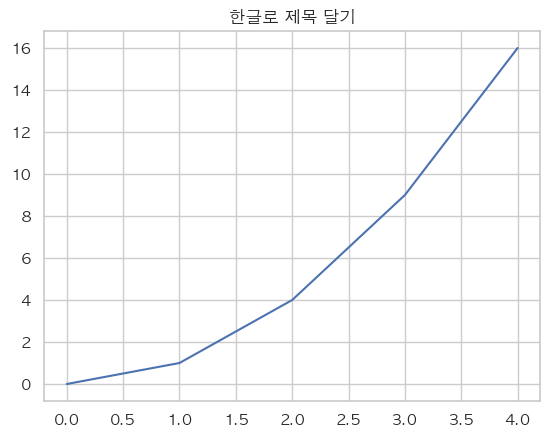

In [249]:
import matplotlib.pyplot as plt
from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 

plt.figure()
plt.plot([i**2 for i in range(5)])
plt.title('한글로 제목 달기')
plt.show()

In [260]:
df['skin_type'] = df['skin_type'].fillna('None')
order = df['skin_type'].value_counts().index

<Axes: xlabel='skin_type', ylabel='count'>

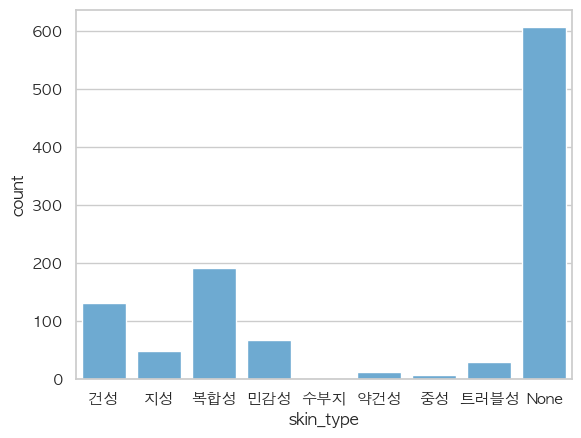

In [261]:
order = ['건성','지성','복합성','민감성','수부지','약건성','중성','트러블성','None']
sns.countplot(data=df, x='skin_type', order=order, color='#5DADE2')

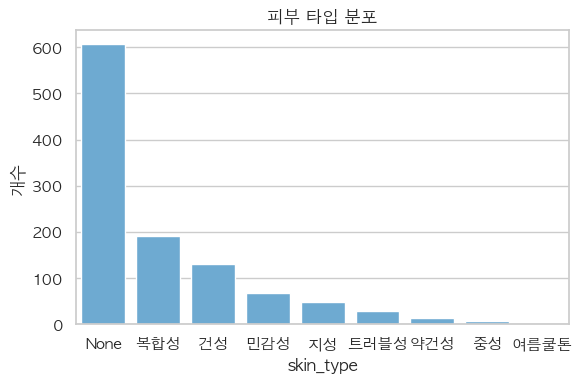

In [262]:
# 1) 피부 타입 분포
plt.figure(figsize=(6,4))
order = df['skin_type'].value_counts().index
sns.countplot(data=df, x='skin_type', order=order, color='#5DADE2')
plt.title('피부 타입 분포')
plt.xlabel('skin_type'); plt.ylabel('개수')
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '01_skin_type_count.png'), dpi=300)
plt.show()

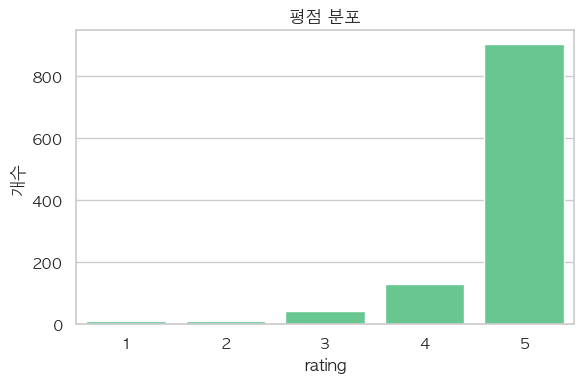

In [251]:
# 2) 평점 분포
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating', color='#58D68D')
plt.title('평점 분포')
plt.xlabel('rating'); plt.ylabel('개수')
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '02_rating_count.png'), dpi=300)
plt.show()

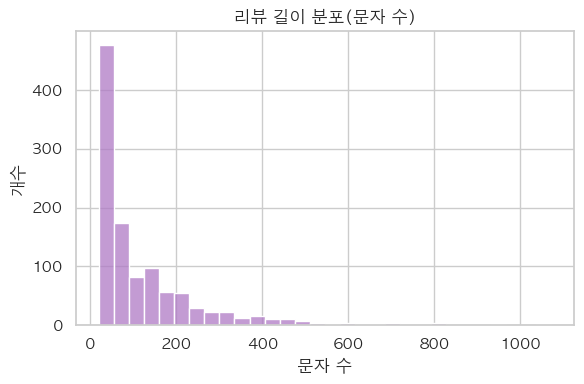

In [252]:
# 3) 리뷰 길이 분포(문자 수)
plt.figure(figsize=(6,4))
sns.histplot(df['review_len'], bins=30, color='#AF7AC5')
plt.title('리뷰 길이 분포(문자 수)')
plt.xlabel('문자 수'); plt.ylabel('개수')
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '03_review_length_hist.png'), dpi=300)
plt.show()

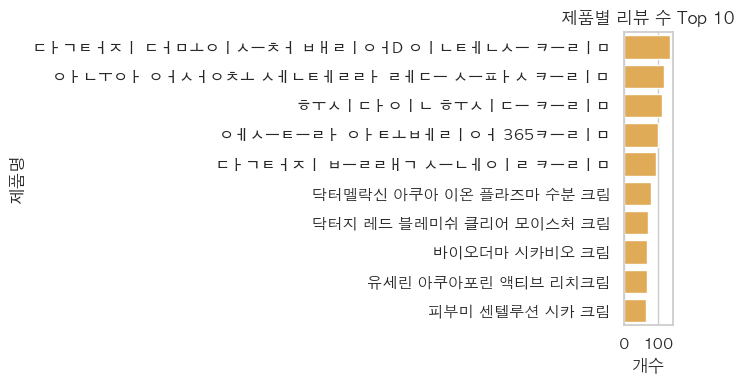

In [253]:
# 4) 제품별 리뷰 개수 Top 10
top_products = df['product_name'].value_counts().head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=top_products.values, y=top_products.index, color='#F5B041')
plt.title('제품별 리뷰 수 Top 10')
plt.xlabel('개수'); plt.ylabel('제품명')
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '04_top_products.png'), dpi=300)
plt.show()

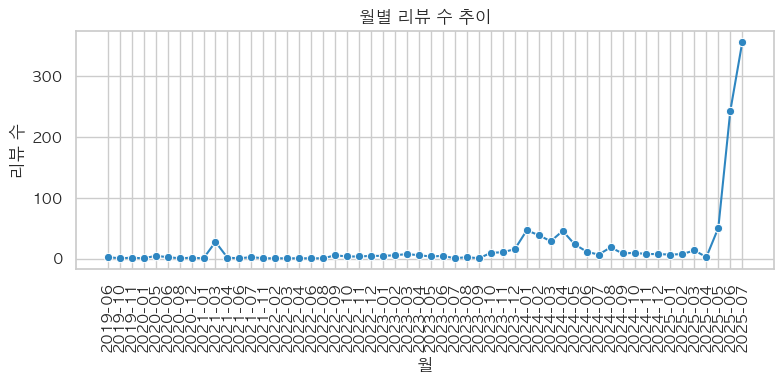

In [254]:
# 5) 월별 리뷰 추이
ts = df.dropna(subset=['month']).groupby('month')['review'].count().sort_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=ts.index, y=ts.values, marker='o', color='#2E86C1')
plt.title('월별 리뷰 수 추이')
plt.xlabel('월'); plt.ylabel('리뷰 수')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '05_reviews_by_month.png'), dpi=300)
plt.show()

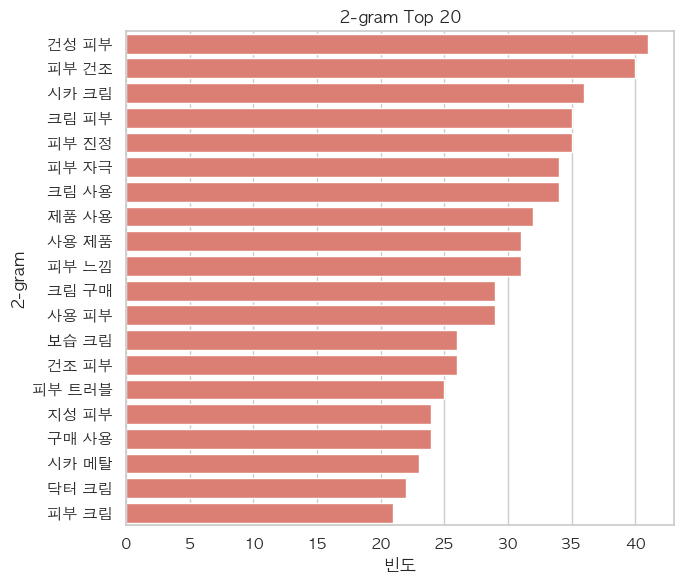

In [255]:
# 7) 빅람(2-gram) 상위 20
from collections import Counter

bigrams = []
if 'Ntoken_review' in df.columns:
    for toks in df['Ntoken_review'].dropna():
        for i in range(len(toks)-1):
            bigrams.append((toks[i], toks[i+1]))

top_bi = Counter(bigrams).most_common(20)
labels = [' '.join(t) for t, _ in top_bi]
vals = [c for _, c in top_bi]

plt.figure(figsize=(7,6))
sns.barplot(x=vals, y=labels, color='#EC7063')
plt.title('2-gram Top 20')
plt.xlabel('빈도'); plt.ylabel('2-gram')
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '07_top_bigrams.png'), dpi=300)
plt.show()

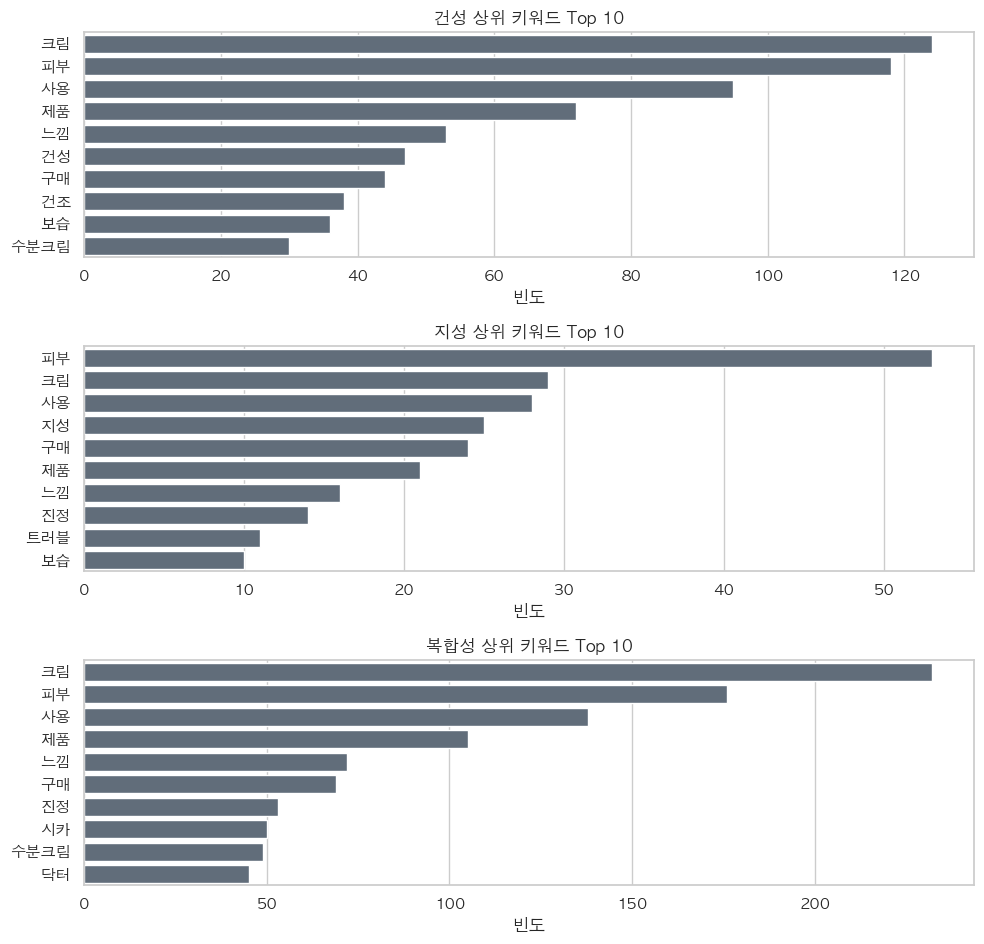

In [256]:
# 8) 피부타입별 상위 키워드 Top 10 (피부타입 3종 예시)
target_types = ['건성', '지성', '복합성']  # 필요시 수정/추가
rows = 3
plt.figure(figsize=(10, 3.2*rows))

for i, t in enumerate(target_types, 1):
    subset = df.loc[df['skin_type'] == t, 'Ntoken_review'].dropna()
    tokens_t = []
    for row in subset:
        tokens_t.extend(row)
    top_t = Counter(tokens_t).most_common(10)
    if not top_t:
        plt.subplot(rows,1,i); plt.axis('off'); plt.title(f'{t} 상위 키워드(데이터 없음)')
        continue
    w, c = zip(*top_t)
    plt.subplot(rows,1,i)
    sns.barplot(x=list(c), y=list(w), color='#5D6D7E')
    plt.title(f'{t} 상위 키워드 Top 10'); plt.xlabel('빈도'); plt.ylabel('')

plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '08_top_keywords_by_skin_type.png'), dpi=300)
plt.show()

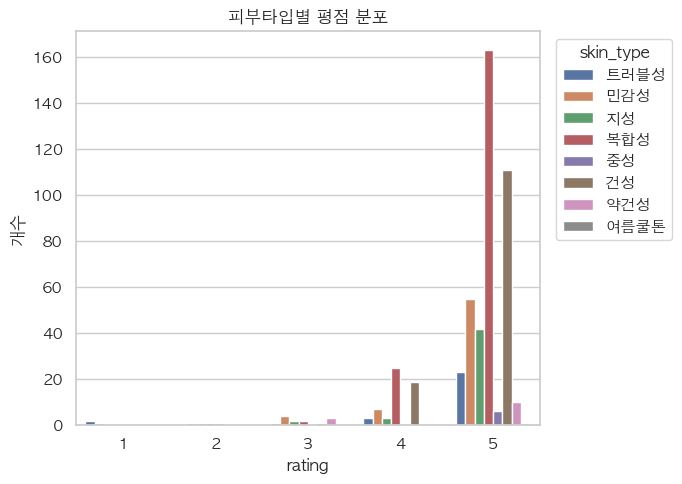

In [257]:
# 9) 피부타입별 평점 분포(Count)
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='rating', hue='skin_type')
plt.title('피부타입별 평점 분포')
plt.xlabel('rating'); plt.ylabel('개수')
plt.legend(title='skin_type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(SAVE_DIR, '09_rating_by_skin_type.png'), dpi=300)
plt.show()

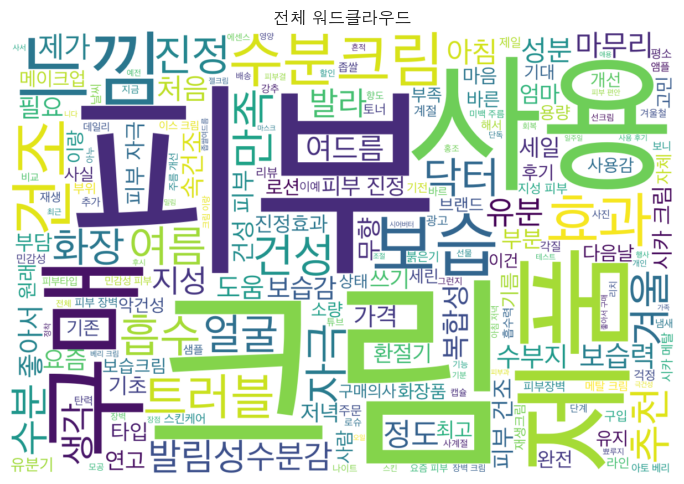

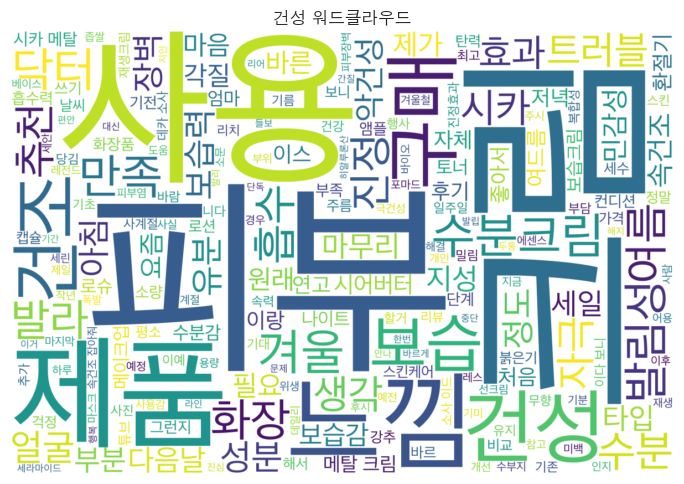

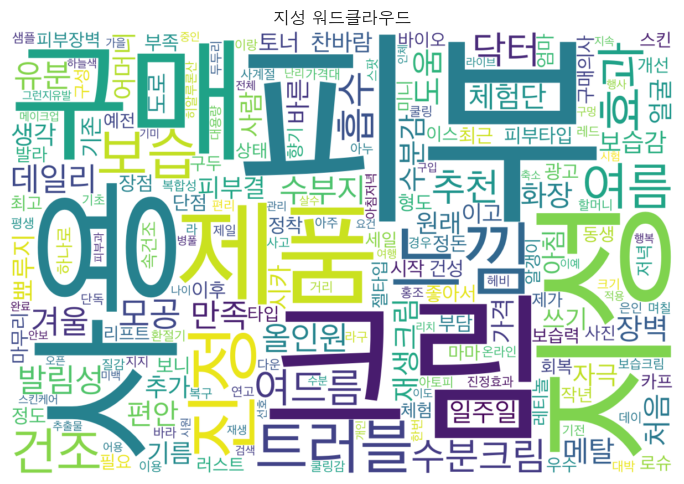

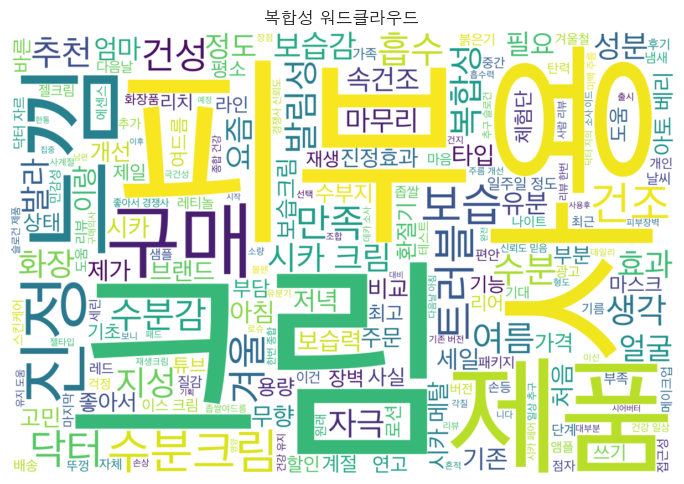

In [258]:
# 10) (옵션) 워드클라우드: 전체 + 피부타입별 
try:
    from wordcloud import WordCloud
    import os

    wc_dir = '/Users/Shared/최종선_교수님/Face_skin_disease/데이터 전처리/figs/wordclouds'
    os.makedirs(wc_dir, exist_ok=True)

    # tokens_all 생성 (셀 단독 실행 가능하도록)
    tokens_all = []
    if 'Ntoken_review' in df.columns:
        for row in df['Ntoken_review'].dropna():
            tokens_all.extend(row)

    def draw_wc(tokens, title, fname):
        if not tokens:
            print(f'{title}: 토큰 없음, 생략')
            return
        text = ' '.join(tokens)
        wc = WordCloud(
            width=1200, height=800, background_color='white',
            font_path='/System/Library/Fonts/AppleSDGothicNeo.ttc'
        ).generate(text)
        plt.figure(figsize=(8,5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.tight_layout()
        plt.savefig(os.path.join(wc_dir, fname), dpi=300)
        plt.show()

    # 전체
    draw_wc(tokens_all, '전체 워드클라우드', 'wc_all.png')

    # 피부타입별(예시 3종)
    for t in ['건성', '지성', '복합성']:
        subset = df.loc[df['skin_type'] == t, 'Ntoken_review'].dropna()
        toks = []
        for row in subset:
            toks.extend(row)
        draw_wc(toks, f'{t} 워드클라우드', f'wc_{t}.png')

except Exception as e:
    print('워드클라우드 생략:', e)